In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statistics
import math
import scipy.stats as stats
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab
import scipy
from scipy import stats

In [5]:
# values from all the different economic data, at least until now.
ten_year_treasury_inflation_indexed_security = pd.read_csv(r"data\10-year-treasury-inflation-indexed-security.csv")
five_year_treasury_inflation_indexed_security = pd.read_csv(r"data\5-year treasury inflation-indexed security.csv")
Gold_annual_average_prices_adjusted_inflation = pd.read_csv("data\Gold-annual-average-prices-adjusted-for-inflation.csv")
Gold_annual_prices_inflation_Adjusted = pd.read_csv("data\Gold-annual-prices-inflation-Adjusted.csv")
MSCI_Emerging_Markets_Historical_Data = pd.read_csv("data\MSCI Emerging Markets Historical Data.csv")
MSCI_World_data_history = pd.read_csv("data\MSCI World data history.csv")
ten_year_treasury_rate_annual_average = pd.read_csv(r"data\ten-year-treasury-rate-annual-average-yield.csv")
world_gdp_gross_domestic_product = pd.read_csv("data\world-gdp-gross-domestic-product.csv")

# transforming the MSCI Date and Prices values for later use in one function. (removing ",", "." and spaces from date and price values).
MSCI_Emerging_Markets_Historical_Data['Year'] = MSCI_Emerging_Markets_Historical_Data.apply(lambda row: row.Date.split(sep=" ")[1], axis=1)
MSCI_Emerging_Markets_Historical_Data['Price'] = MSCI_Emerging_Markets_Historical_Data.apply(lambda row: row.Price.replace(",",""), axis=1)

MSCI_World_data_history['Year'] = MSCI_World_data_history.apply(lambda row: row.Date.split(sep=" ")[1], axis=1)
MSCI_World_data_history['Price'] = MSCI_World_data_history.apply(lambda row: row.Price.replace(".",""), axis=1)
MSCI_World_data_history['Price'] = MSCI_World_data_history.apply(lambda row: row.Price.replace(",","."), axis=1)

def averages(dataframe):
    # function for annual averages, enters the dataframes above, and return 
    # the annual average price and the year.
    averages = []
    years = list(dict.fromkeys(dataframe["Year"]))
    for i in years:
        a = dataframe[dataframe["Year"]== i]
        values = pd.to_numeric(a["Price"])
        averages.append(round(statistics.mean(values),2))
    return(pd.DataFrame(averages,years))

# annual average from monthly data from MSCI_emerging and developed markets.
MSCI_Emerging_Markets_annual_average = averages(MSCI_Emerging_Markets_Historical_Data)
MSCI_Emerging_Markets_annual_average.columns =['Annual Average Prices']
MSCI_Emerging_Markets_annual_average = MSCI_Emerging_Markets_annual_average.iloc[1:,:]

MSCI_World_annual_average = averages(MSCI_World_data_history)
MSCI_World_annual_average.columns = ['Annual Average Prices']
MSCI_World_annual_average = MSCI_World_annual_average.iloc[1:,:]


# Next it is needed to place all the necessary data from all variables in the same
# dataframe, from 2004 to 2020.

# years
years = Gold_annual_prices_inflation_Adjusted.iloc[1:18,0]
years = years.iloc[::-1]
years.reset_index(drop=True,inplace=True)

# Gold annual average closing prices adusted for inflation
Gold_average_AJ = Gold_annual_average_prices_adjusted_inflation.iloc[1:18,1]
Gold_average_AJ = Gold_average_AJ.iloc[::-1]
Gold_average_AJ.reset_index(drop=True,inplace=True)

# Gold annual closing prices adjusted for inflation.
Gold_closing_AJ = Gold_annual_prices_inflation_Adjusted.iloc[1:18,1] 
Gold_closing_AJ = Gold_closing_AJ.iloc[::-1]
Gold_closing_AJ.reset_index(drop=True,inplace=True)

# 10 year treasury inflation indexed secuurity.
ten_year_TIPS = ten_year_treasury_inflation_indexed_security.iloc[1:,1]
ten_year_TIPS.reset_index(drop=True,inplace=True)

# 5 year treasury inflation indexed secuurity.
five_year_TIPS = five_year_treasury_inflation_indexed_security.iloc[1:,1]
five_year_TIPS.reset_index(drop=True,inplace=True)

# MSCI emerging markets index annual average prices.
MSCI_EM = MSCI_Emerging_Markets_annual_average['Annual Average Prices']
MSCI_EM = MSCI_EM.iloc[::-1]
MSCI_EM.reset_index(drop=True,inplace=True)

# MSCI developed countries markets index annual average prices.
MSCI_WM = MSCI_World_annual_average['Annual Average Prices']
MSCI_WM = MSCI_WM.iloc[::-1]
MSCI_WM.reset_index(drop=True,inplace=True)

# 10 year treasury rate annual average.
ten_year_TR = ten_year_treasury_rate_annual_average.iloc[1:18,1]
ten_year_TR = ten_year_TR.iloc[::-1]
ten_year_TR.reset_index(drop=True,inplace=True)

# world gdp gross domestic product Per capita (US $)
world_gdp = world_gdp_gross_domestic_product.iloc[44:63,2]
world_gdp.reset_index(drop=True,inplace=True)

# the new aggregated dataset, the main dataset for the analysis.
df = pd.concat([years,Gold_average_AJ,Gold_closing_AJ,ten_year_TIPS,five_year_TIPS,MSCI_EM,MSCI_WM,ten_year_TR,world_gdp],axis=1)
df.columns = ["years","Gold_average_AJ","Gold_closing_AJ","ten_year_TIPS","five_year_TIPS","MSCI_EM","MSCI_WM","ten_year_TR","world_gdp"]
df.head()

#graph1 = sns.lineplot(x = df.iloc[:,0], y = df.iloc[:,1]).set_title('Gold Average Prices')
#print(graph1)

,years,Gold_average_AJ,Gold_closing_AJ,ten_year_TIPS,five_year_TIPS,MSCI_EM,MSCI_WM,ten_year_TR,world_gdp
0,2004,409.53,438.0,1.83,1.04,465.49,1089.37,4.27,6824.0942
1,2005,444.99,513.0,1.81,1.50,598.83,1181.07,4.29,7298.1082
2,2006,604.34,635.7,2.31,2.28,800.22,1366.86,4.80,7813.4396
3,2007,696.43,836.5,2.29,2.15,1083.37,1578.75,4.63,8696.5058
4,2008,872.37,865.0,1.77,1.30,941.60,1288.32,3.66,9427.8434


{'whiskers': [<matplotlib.lines.Line2D at 0x24e27f2a280>,
 'caps': [<matplotlib.lines.Line2D at 0x24e27f2a9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e27f1eeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x24e27f36100>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e27f36490>],
 'means': []}

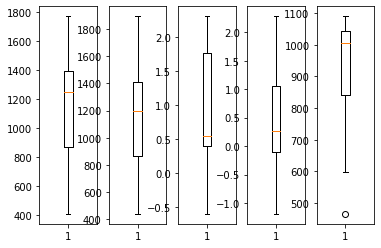

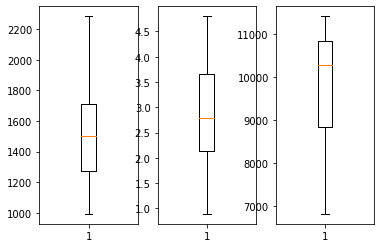

In [4]:
#trying to find outliers.
fig, axs = plt.subplots(1,5)
axs[0].boxplot(Gold_average_AJ)
axs[1].boxplot(Gold_closing_AJ)
axs[2].boxplot(ten_year_TIPS)
axs[3].boxplot(five_year_TIPS)
axs[4].boxplot(MSCI_EM)

fig1, axs1 = plt.subplots(1,3)
axs1[0].boxplot(MSCI_WM)
axs1[1].boxplot(ten_year_TR)
axs1[2].boxplot(world_gdp)

In [5]:
# outliers:
# MSCI Emerging countries outliers
MSCI_EM[MSCI_EM < 500]

# few data points and dont seem to e necessary to remove a observation from the
# dataset

0    465.49
Name: Annual Average Prices, dtype: float64

In [6]:
df.iloc[0,:]

years              2004.0000
Gold_average_AJ     409.5300
Gold_closing_AJ     438.0000
ten_year_TIPS         1.8300
five_year_TIPS        1.0400
MSCI_EM             465.4900
MSCI_WM            1089.3700
ten_year_TR           4.2700
world_gdp          6824.0942
Name: 0, dtype: float64

In [7]:
# multiple correlation.
df.iloc[:,1:].corr(method="pearson")

,Gold_average_AJ,Gold_closing_AJ,ten_year_TIPS,five_year_TIPS,MSCI_EM,MSCI_WM,ten_year_TR,world_gdp
Gold_average_AJ,1.000000,0.968298,-0.908641,-0.874860,0.736171,0.504840,-0.897288,0.893824
Gold_closing_AJ,0.968298,1.000000,-0.829622,-0.786979,0.746051,0.502759,-0.838940,0.837412
ten_year_TIPS,-0.908641,-0.829622,1.000000,0.952082,-0.490375,-0.532538,0.963325,-0.806323
five_year_TIPS,-0.874860,-0.786979,0.952082,1.000000,-0.402401,-0.282620,0.890637,-0.706037
MSCI_EM,0.736171,0.746051,-0.490375,-0.402401,1.000000,0.572743,-0.490770,0.829437
MSCI_WM,0.504840,0.502759,-0.532538,-0.282620,0.572743,1.000000,-0.584056,0.695243
ten_year_TR,-0.897288,-0.838940,0.963325,0.890637,-0.490770,-0.584056,1.000000,-0.823525
world_gdp,0.893824,0.837412,-0.806323,-0.706037,0.829437,0.695243,-0.823525,1.000000


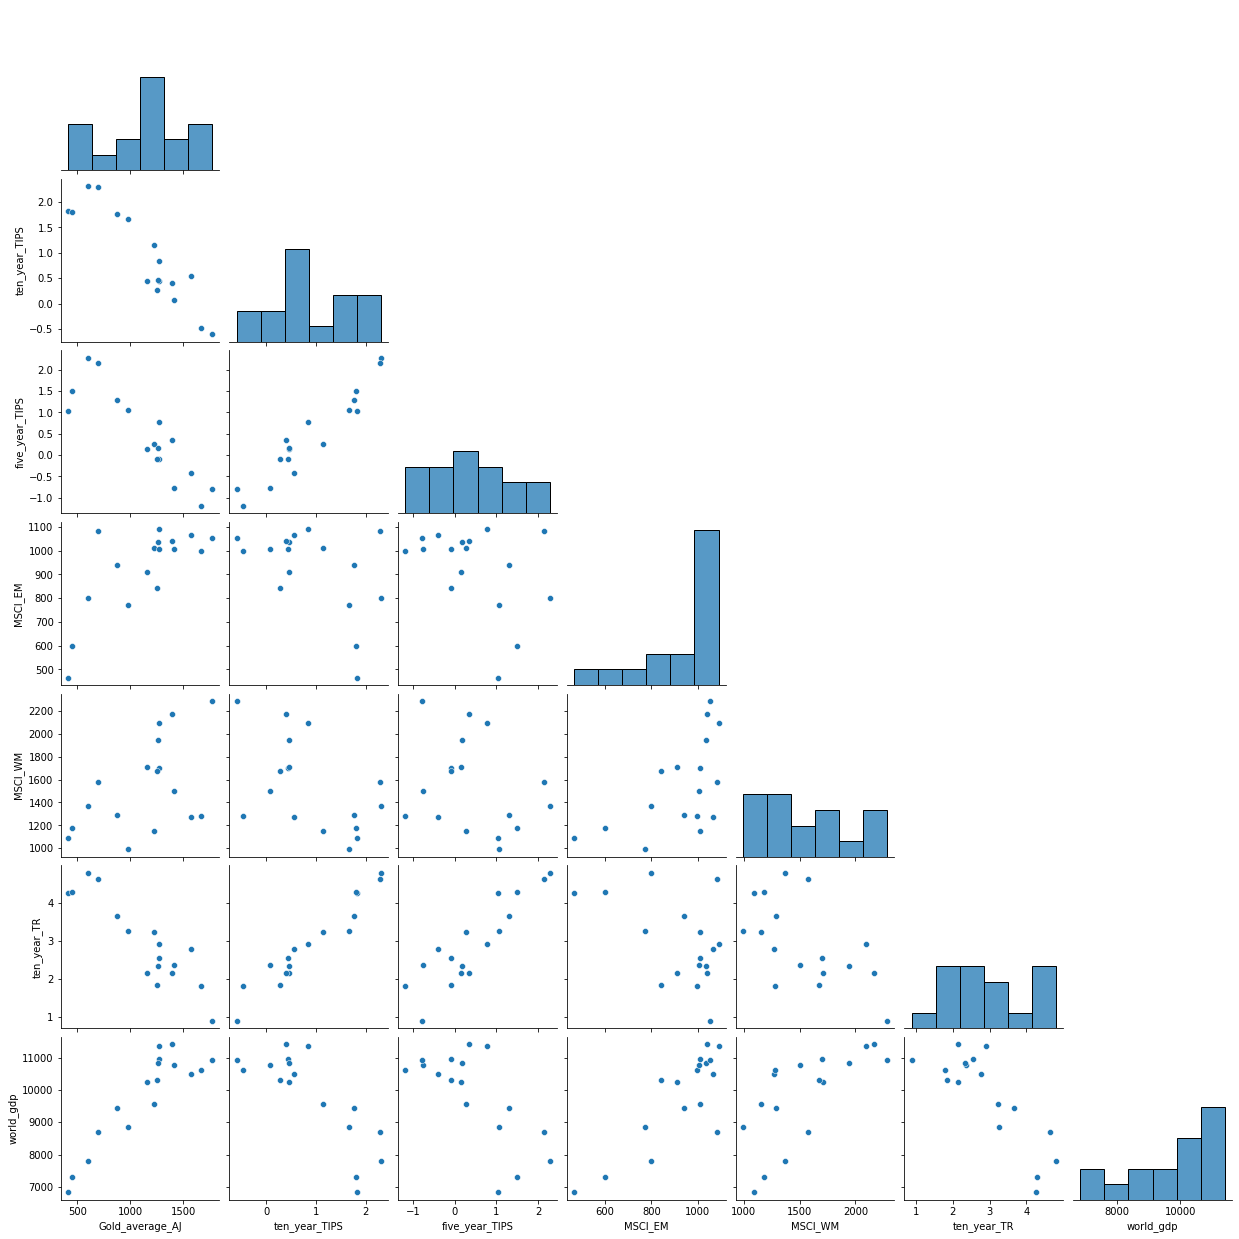

In [8]:
# pairplot of all data from the df. (Gold average AJ)
sns.pairplot(df.iloc[:,[1,3,4,5,6,7,8]],corner=True)

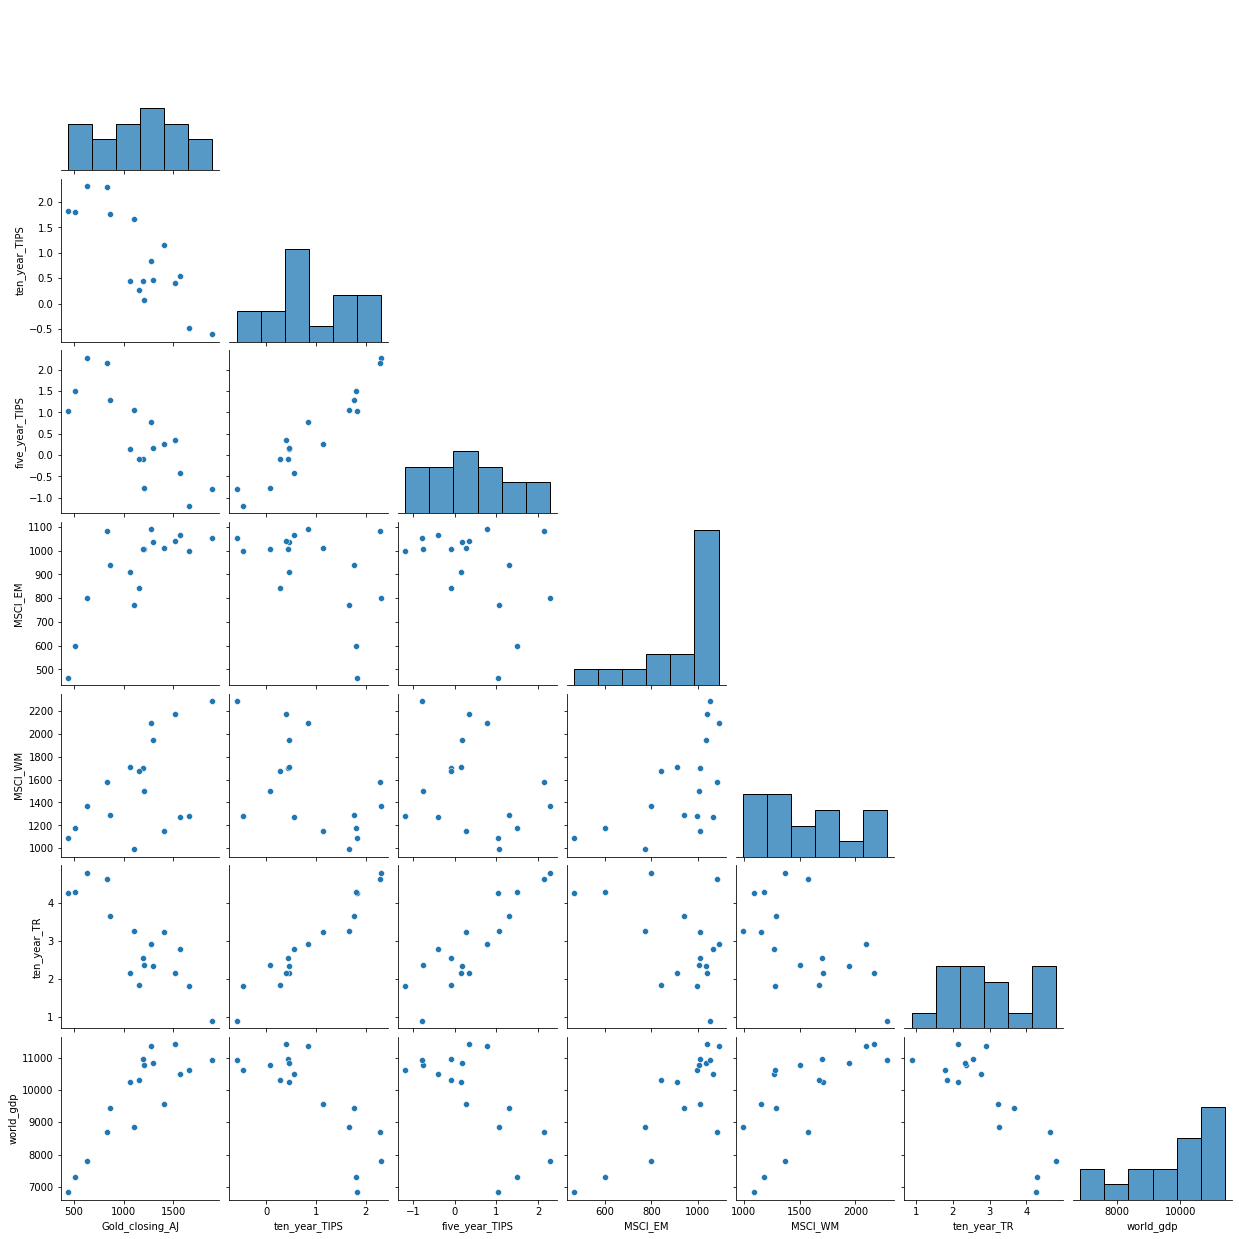

In [9]:
# pairplot of all data from the df. (Gold closing AJ)
sns.pairplot(df.iloc[:,[2,3,4,5,6,7,8]],corner=True) 

In [10]:
# trying to fit a good multiple Linear Regression model to represent the data.
# independent variables without years
x = df.iloc[:,[2,3,4,5,6,7,8]]

# dependent variables.
y = df["Gold_average_AJ"]

# regression modeland fit.
reg = LinearRegression()
reg.fit(x,y)

# Return the coefficient of determination R^2 of the prediction.
print("\ncoefficient of determination R^2:",reg.score(x,y),"\n")

# model coefficients:
print("model coefficients:",reg.coef_,"\n")

#model intercept:
print("model intercept:",reg.intercept_,"\n")


coefficient of determination R^2: 0.9905419087268419 

model coefficients: [ 4.93667848e-01 -1.39409764e+02 -1.54640622e+01  2.63091192e-01
 -1.21736635e-01 -8.05026336e+00  5.05794173e-02] 

model intercept: 167.09183919319457 



In [11]:
x = sm.add_constant(x)
mod = sm.OLS(y,x)
res = mod.fit()
print(res.summary())
#print(res.predict())
#print(res.params)

                            OLS Regression Results                            
Dep. Variable:        Gold_average_AJ   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           2.21e-08
Time:                        02:11:54   Log-Likelihood:                -86.207
No. Observations:                  17   AIC:                             188.4
Df Residuals:                       9   BIC:                             195.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             167.0918    342.308     

C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


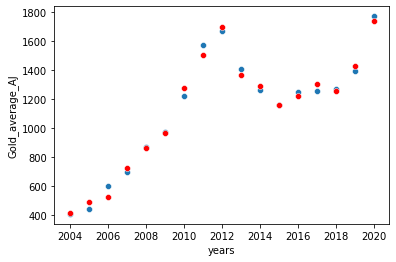

In [12]:
# residual analysis:

# predicted values:
predicted = res.predict()

# residuals:
residuals = Gold_average_AJ - predicted

# multiple linear regression graph: (adjusted and predicted)
predicted = res.predict()

sns.scatterplot(x = df.iloc[:,0],y=y)
sns.scatterplot(x=df.iloc[:,0],y=predicted,color="red")

# leverage calculation. First manual using the formula: H = X'*(X*X')^-1*X
a = np.array(df.iloc[:,[2,4,5]])
H = np.dot(np.dot(a,np.linalg.inv(np.dot(a.transpose(),a))),a.transpose())
leaverage = H.diagonal()

influence = res.get_influence()

# leverage calculation automatic:
leverage_python = influence.hat_matrix_diag

# standardized and studentized residuals.
standardized_residuals = np.array(influence.resid_studentized_internal)
studentized_residuals = np.array(influence.resid_studentized_external)

# cook's distance for each observation.
cooks = influence.cooks_distance

# adding the standardized and studentized residuals to the datatable.
df["standardized_residuals"] = standardized_residuals
df["studentized_residuals"] = studentized_residuals

<AxesSubplot:ylabel='Average Closing Price '>

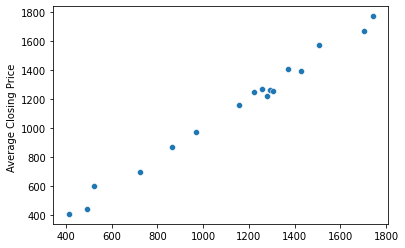

In [13]:
# Scatterplot of Observed vs Predicted:
sns.scatterplot(x= predicted, y= Gold_average_AJ)

<AxesSubplot:ylabel='Average Closing Price '>

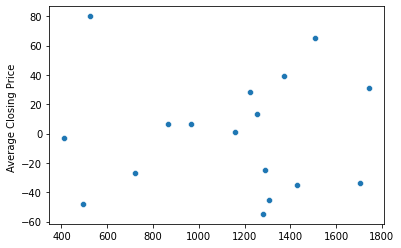

In [14]:
# residuals scatterplot (residuals vs predicted values).
sns.scatterplot(x = predicted,y = residuals)

<AxesSubplot:>

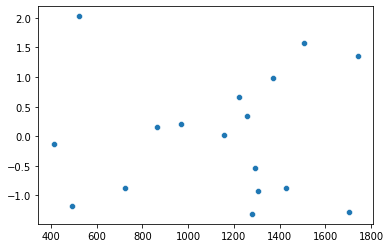

In [15]:
# studentized residuals plot.
sns.scatterplot(x = predicted,y = standardized_residuals)

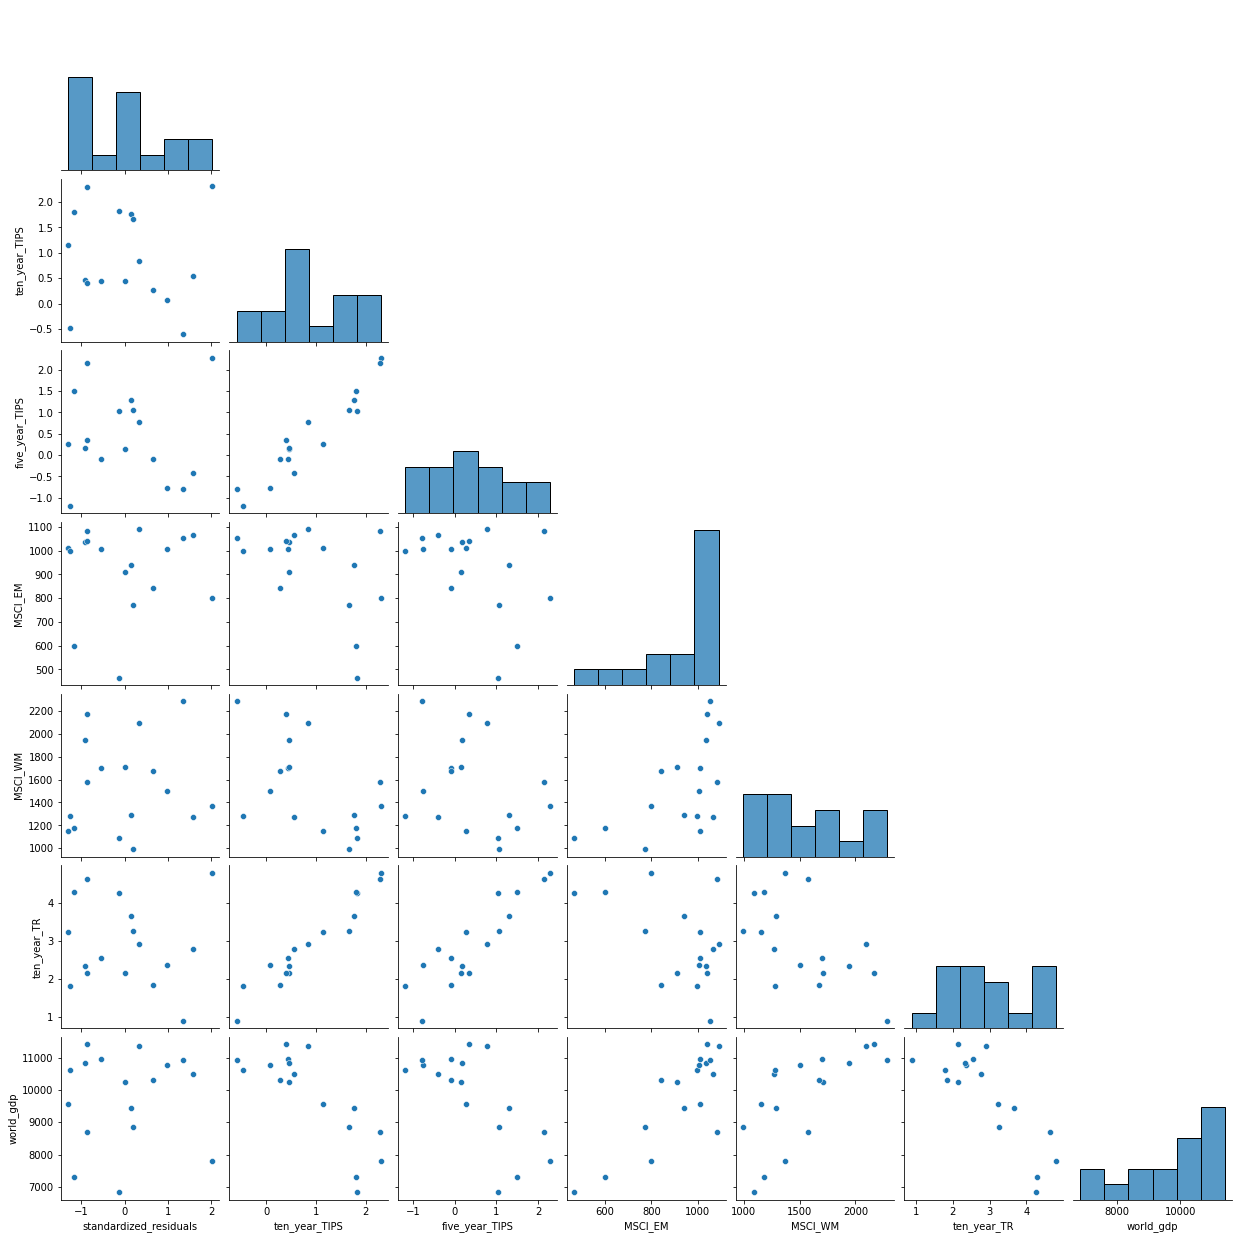

In [16]:
# pairplot for standardized residuals vs independent variables. (Gold closing AJ)
sns.pairplot(df.iloc[:,[9,3,4,5,6,7,8]],corner=True)

ShapiroResult(statistic=0.9395677447319031, pvalue=0.31309598684310913)
KstestResult(statistic=0.4117647058823529, pvalue=0.11237727674551706)
AndersonResult(statistic=0.3392121054269204, critical_values=array([0.501, 0.571, 0.685, 0.799, 0.951]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


((array([-1.7512281 , -1.29947609, -1.01741764, -0.79927841, -0.61386703,
         -0.44755083, -0.29283065, -0.14485444,  0.        ,  0.14485444,
          0.29283065,  0.44755083,  0.61386703,  0.79927841,  1.01741764,
          1.29947609,  1.7512281 ]),
  array([-1.31137458, -1.27245964, -1.17895848, -0.92115491, -0.8790551 ,
         -0.87061583, -0.53325626, -0.13113337,  0.02116284,  0.15695785,
          0.20336329,  0.34425561,  0.66015113,  0.98193976,  1.35064506,
          1.57834391,  2.02747075])),
 (1.0819478758227283, 0.013310707162526242, 0.9778282179926125))

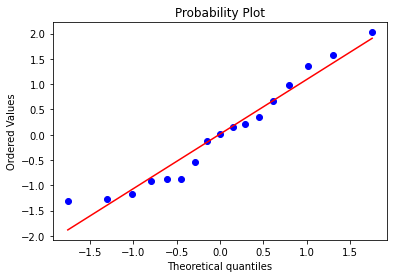

In [17]:
# Normality tests:
# shapiro-wilk
test1 = scipy.stats.shapiro(standardized_residuals)
print(test1)

# Kolmogorov-Smirnov:
normal = np.random.normal(0,1,17)
test2 = stats.ks_2samp(standardized_residuals,normal,alternative='two-sided')
print(test2)

# Anderson-Darling:
test3 = scipy.stats.anderson(standardized_residuals,"norm")
print(test3)

# qqplot:
scipy.stats.probplot(standardized_residuals, dist="norm", plot=plt)

C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='standardized_residuals', ylabel='Density'>

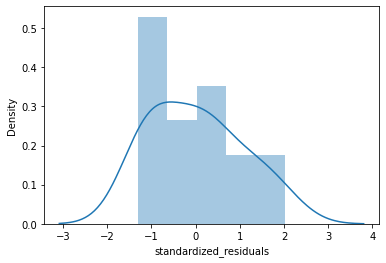

In [18]:
sns.distplot(df.iloc[:,9],bins=5)

C:\Users\erick\anaconda3\envs\Analysis\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

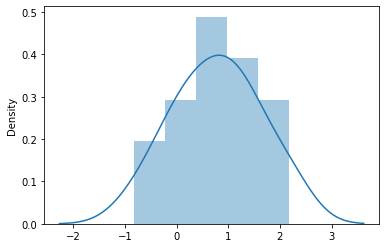

In [19]:
sns.distplot(normal,bins=5)

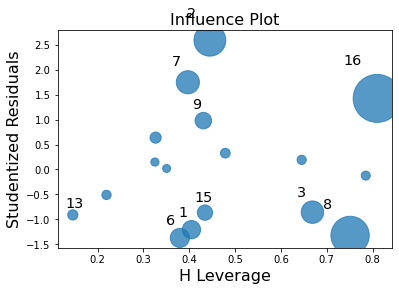

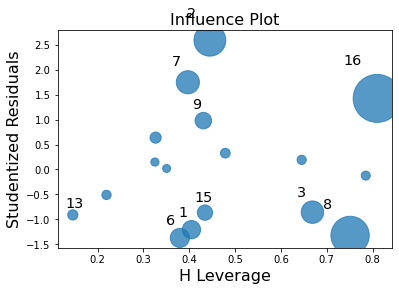

In [20]:
# influence plot.
sm.graphics.influence_plot(res,criterion="cooks",alpha=0.5)

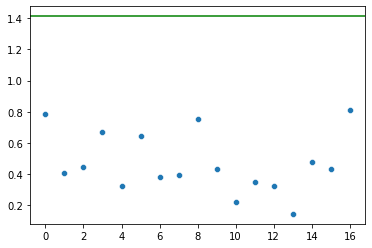

In [21]:
# leverage plot:
u = statistics.mean(leverage_python)
i = np.arange(0,17,1)

graph = sns.scatterplot(x = i,y = leverage_python)
graph.axhline(3*(8/17),color="green")

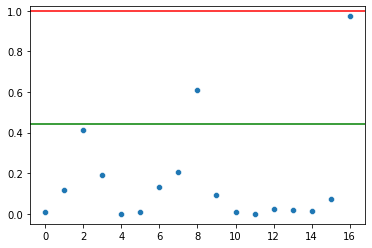

In [22]:
# cooks distance plot:
u = statistics.mean(cooks[0])
i = np.arange(0,17,1)

graph = sns.scatterplot(x = i,y = cooks[0])
graph.axhline(4/(17-7-1),color="green")
graph.axhline(1,color="red")

In [23]:
# the most influencial point.
df.iloc[16,:]

years                      2020.000000
Gold_average_AJ            1773.730000
Gold_closing_AJ            1895.100000
ten_year_TIPS                -0.600000
five_year_TIPS               -0.790000
MSCI_EM                    1052.420000
MSCI_WM                    2286.050000
ten_year_TR                   0.890000
world_gdp                 10925.746100
standardized_residuals        1.350645
studentized_residuals         1.426108
Name: 16, dtype: float64